Your Name and PRN:
- Name : Anurag Sahu & Pankaj Gaikwad
- PRN  : 250840128011 & 22
- Date : 13 Nov 2025 

# Deep Neural Networks
## Assignment 02


## Take Single Layer Model and add Sigmoid activation function

In [2]:
###-----------------
### Import libraries
###-----------------
from pathlib import Path  # Import Path for file system path operations and management
import numpy as np  # Import NumPy for numerical computations and array operations
import pandas as pd  # Import Pandas for data manipulation and analysis with DataFrames
import matplotlib.pyplot as plt  # Import Matplotlib for creating static, interactive visualizations
import seaborn as sns  # Import Seaborn for statistical data visualization built on Matplotlib

from sklearn.datasets import make_moons
from sklearn.model_selection import  train_test_split # Import function to split dataset into training and testing subsets
from sklearn.metrics import * # Import function to calculate various metric

In [ ]:
###------------------
### Global Parameters
###------------------

# Directories
#inpDir = '../../input'
inpDir = Path('.') / '..' / 'input'
# outDir = '../output'
outDir = Path('.') / 'output'

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)  # Set Random Seed for reproducible  results
rng = np.random.default_rng(RANDOM_STATE)

TEST_SIZE = 0.2  # Size of test data
NOISE = 0.2
EPOCHS = 21
ALPHA = 0.01  # Learning Rate
N_SAMPLE = 1000  #

# Parameters for plotting
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'large',
          'axes.titlesize': 'large',
          'xtick.labelsize': 'medium',
          'ytick.labelsize': 'medium'
          }

CMAP = plt.cm.coolwarm

plt.rcParams.update(params)

plt.style.use('seaborn-v0_8-darkgrid')  # plt.style.use('ggplot')

In [4]:
def fn_plot_decision_boundary(x: np.ndarray, wts: np.ndarray, pred_func):
    """
    Plots the decision boundary for a classification model along with the data points.

    Args:
        x (np.ndarray): Input feature matrix with shape (n_samples, 3)
        wts (np.ndarray): Weights matrix
        pred_func: Function to predict using weights and datapoints
    """

    # Initialize the figure with specified dimensions
    fig, ax = plt.subplots(figsize=(8, 5))

    # Small increment value to create a fine grid for smooth decision boundary
    dm = 0.05
    padding = 2 * dm

    # Calculate the range for x-axis (first feature) with padding
    x_min, x_max = x[:, 0].min() - padding, x[:, 0].max() + padding

    # Calculate the range for y-axis (second feature) with padding
    y_min, y_max = x[:, 1].min() - padding, x[:, 1].max() + padding

    # Create a mesh grid covering the entire feature space
    xx, yy = np.meshgrid(np.arange(x_min, x_max, dm),
                         np.arange(y_min, y_max, dm))

    # Flatten the mesh grid arrays and stack them column-wise to create coordinate pairs
    XX = np.c_[xx.ravel(), yy.ravel()]  # Resulting shape: (n_points, 2)

    # Add a column of ones to the coordinate array for the bias term
    XX = np.hstack((XX, np.ones((XX.shape[0], 1))))  # make array compatible

    # List to collect predictions for each point in the mesh grid
    y_pred = []

    # Iterate over each coordinate point in the mesh grid
    for row in XX:
        # Make prediction for the current coordinate using global 'weights' and 'predict' function
        y_p = pred_func(row, wts)
        y_pred.append(y_p)

    # Reshape predictions to match the original mesh grid dimensions
    Z = np.array(y_pred).reshape(xx.shape)

    # Create filled contour plot showing the decision regions
    ax.contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.Paired)

    # Scatter plot of the actual data points, colored by their true class labels
    ax.scatter(x[:, 0], x[:, 1], c=x[:, 2], s=20, edgecolor='k', cmap=plt.cm.bwr)

    # Set plot title and axis labels
    ax.set_title('Decision Boundary')
    ax.set_xlabel('A')
    ax.set_ylabel('B')

    # Display the final plot
    plt.show()

In [5]:
X,y=make_moons(n_samples=N_SAMPLE,noise=NOISE,random_state=RANDOM_STATE)

In [6]:
X[:5],y[:5]

(array([[ 0.90633951,  0.90267624],
        [-1.11536828,  0.75579289],
        [ 1.88769158,  0.4175967 ],
        [-0.93345034, -0.02299851],
        [-0.96872877,  0.06396285]]),
 array([0, 0, 1, 0, 0]))

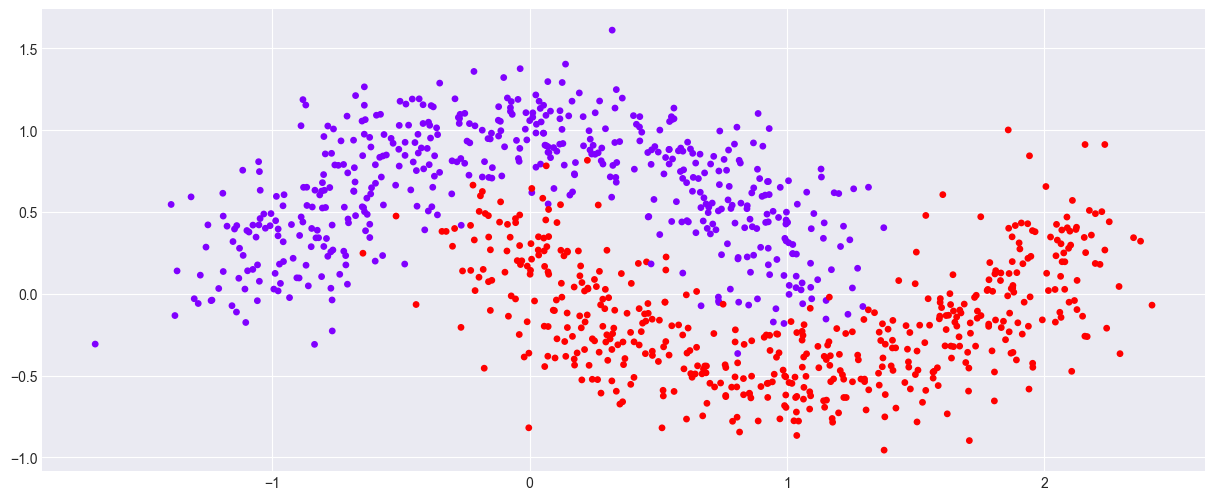

In [11]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='rainbow',s=15)
plt.show()

In [12]:
data_df=pd.DataFrame(X,columns=['A',"B"])
data_df['target']=y
data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


In [18]:

data_train, data_test = data_df.to_numpy()[:900], data_df.to_numpy()[900:]

print (data_train.shape, data_test.shape)

print (type(data_train), type(data_test))

(900, 3) (100, 3)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [14]:
def fn_sigmoid(z):
    return 1/(1+np.exp(-z))

In [15]:
def predict(row, wts) -> float:
    z= wts[0] + sum(wts[i+1]*row[i] for i in range(len(row)-1))
    return fn_sigmoid(z)

In [21]:
def train_weights(train,alpha,n_epochs,seed):
    error=[]
    rng=np.random.default_rng(seed=seed)
    weights=rng.random(train.shape[1])  ## index[0] contain bias
    m=train.shape[0]

    for epoch in range(n_epochs):
        sum_error=0
        for row in train:
            pred=predict(row,weights)
            dz=pred - row[-1]
            sum_error += -(row[-1]*np.log(pred) + (1-row[-1]) * np.log(1-pred))

            weights[0] = weights[0] - alpha*dz  ## bias updation

            for i in range(len(row)-1):
                weights[i+1] = weights[i+1] - alpha*dz*row[i]

        error.append(sum_error/m)
    
    return error,weights




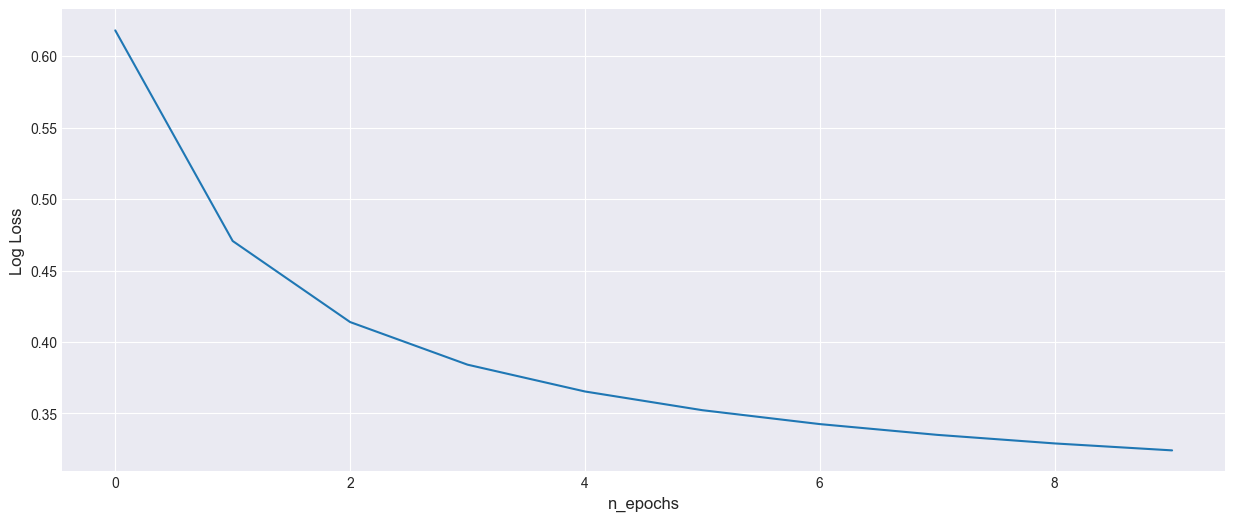

In [22]:
error, weights = train_weights(train=data_train, alpha=0.005, n_epochs=10, seed=RANDOM_STATE)
fig, ax = plt.subplots()
plt.xlabel('n_epochs')

plt.ylabel('Log Loss')
ax.plot(error)
plt.show()

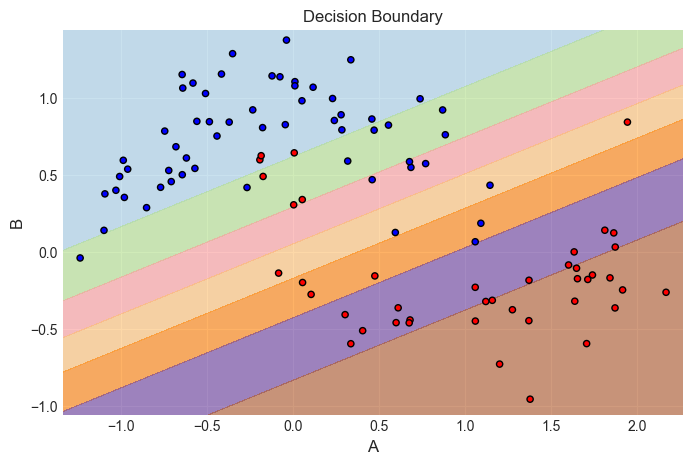

In [23]:
fn_plot_decision_boundary(data_test, weights, predict)

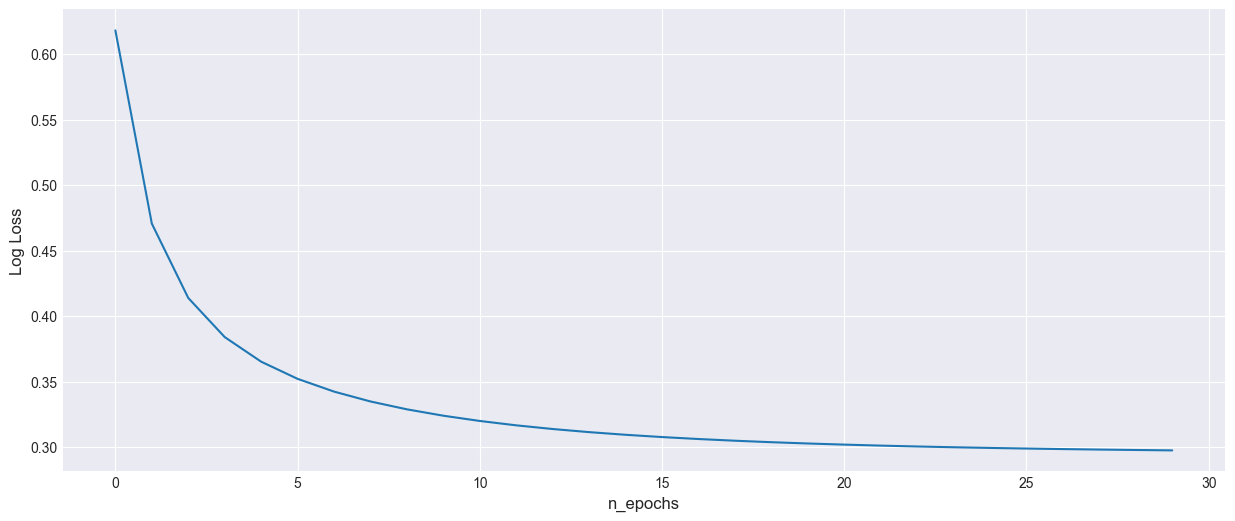

In [25]:
error, weights = train_weights(train=data_train, alpha=0.005, n_epochs=30, seed=RANDOM_STATE)
fig, ax = plt.subplots()
plt.xlabel('n_epochs')

plt.ylabel('Log Loss')
ax.plot(error)
plt.show()

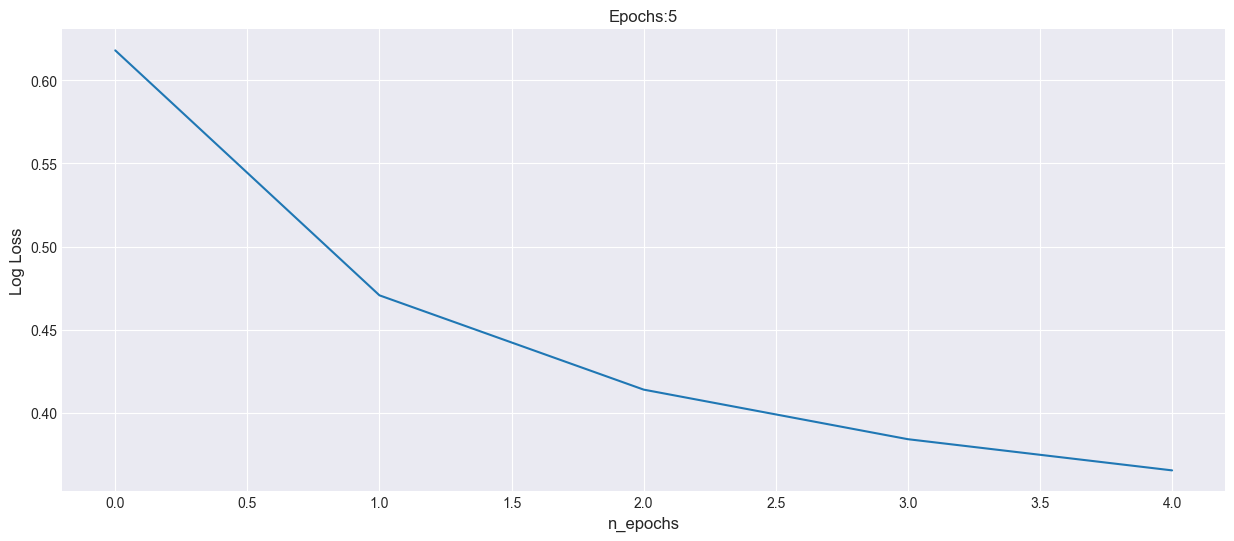

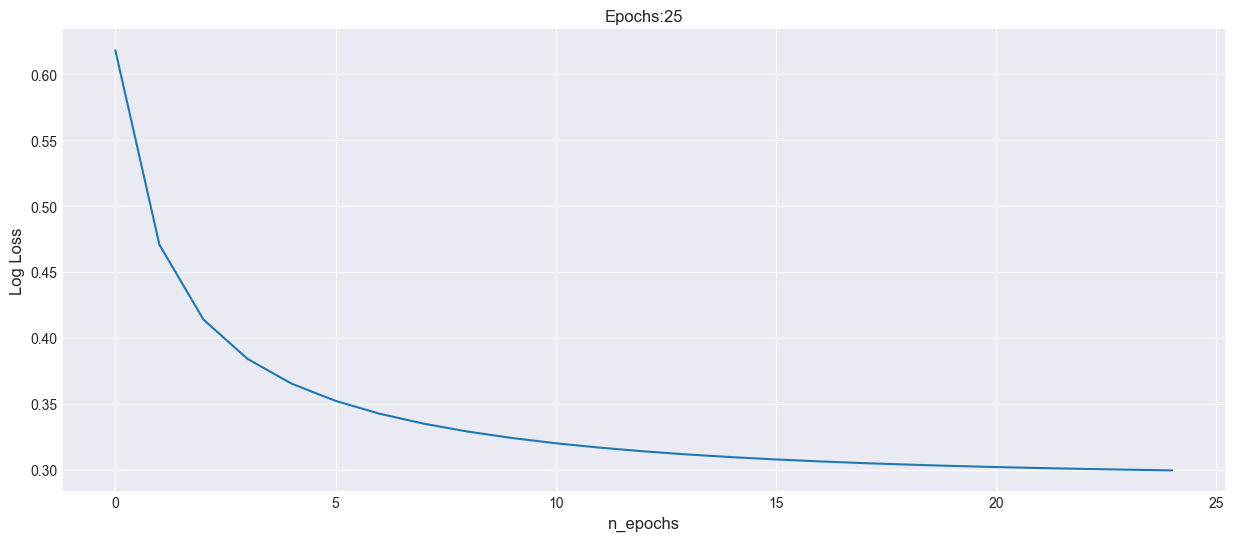

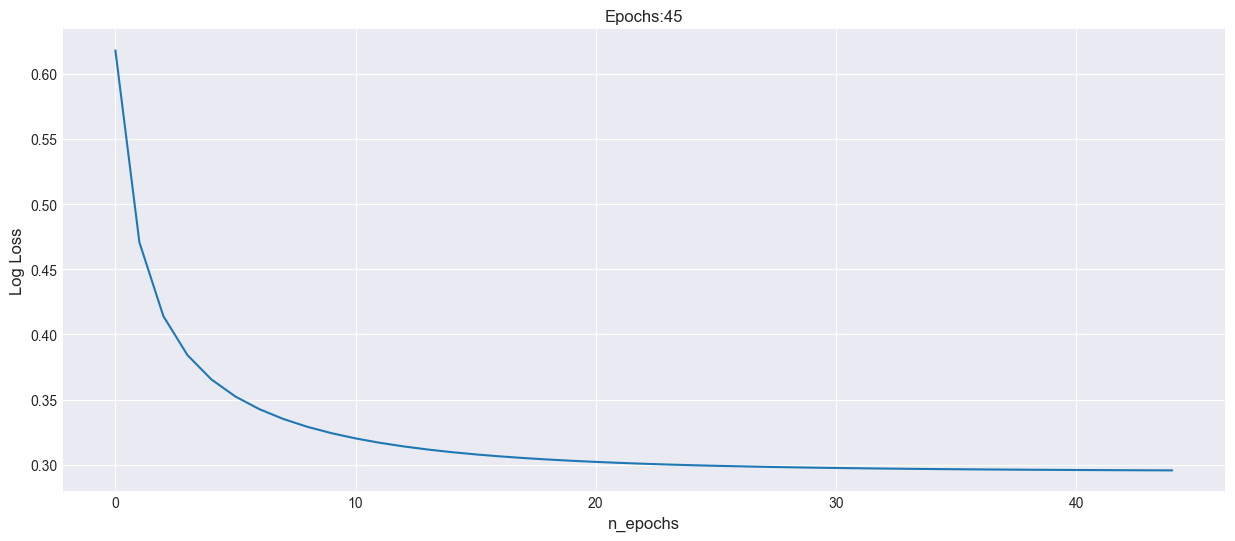

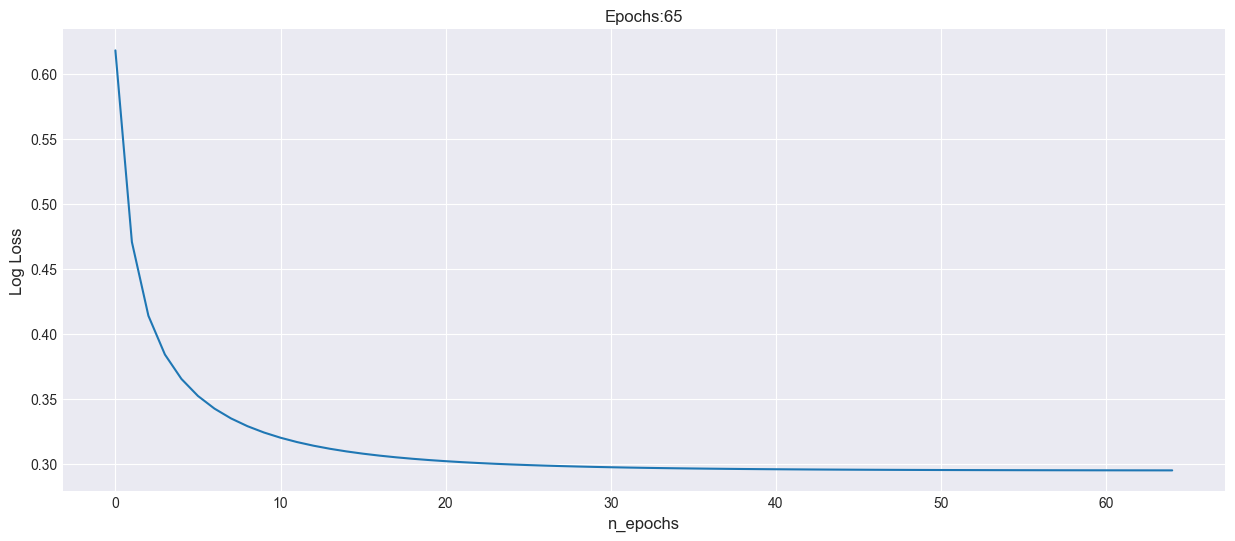

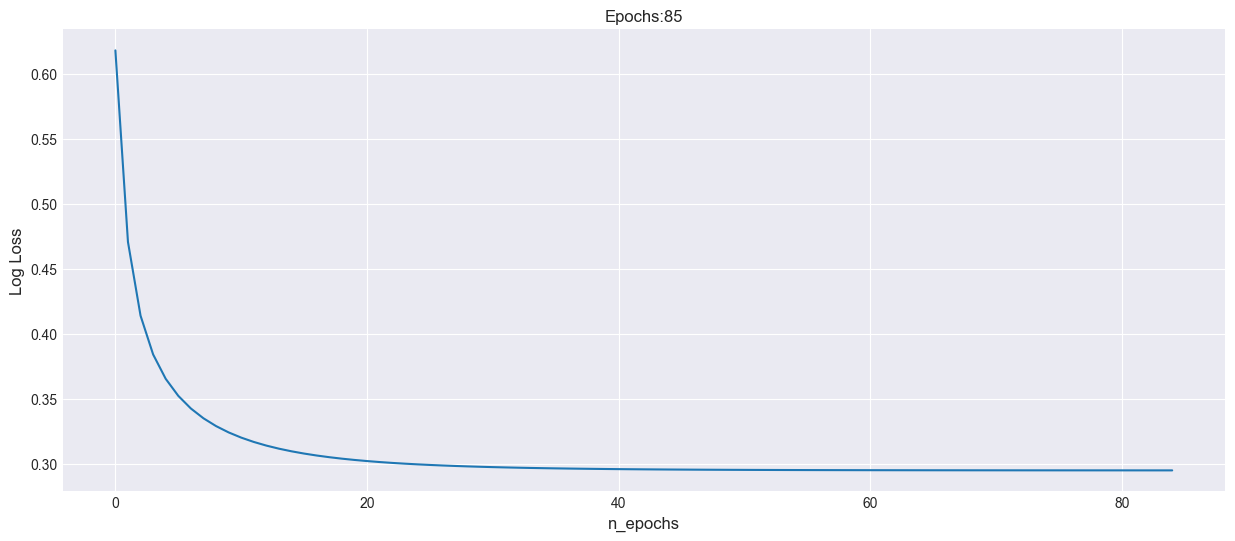

In [31]:
for i in range(5,100,20):

    error, weights = train_weights(train=data_train, alpha=0.005, n_epochs=i, seed=RANDOM_STATE)
    fig, ax = plt.subplots()
    plt.title(f"Epochs:{i}")
    plt.xlabel('n_epochs')
    plt.ylabel('Log Loss')
    ax.plot(error)
    plt.show()

#### Observation :
For the graphs plotted for loss against the number of epochs, it is observed that, for a learning rate of 0.01, the loss stopped decreasing significantly after 10 epochs.This leads us to believe that, for non-linearly separable data, the linear decision boundary created by the single neuron perceptron does not perform well in classification of the data

**We can also inference that the decrease of the learning rate should lead to the increase of the number of epochs to get optimal performance(learning_rate is inversely proportional to n_epochs)**